In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'shop data.csv')
df.head()

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes


In [3]:
x = df.drop('buys',axis=1)
x.head()

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single


In [4]:
y = df['buys']
y.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: buys, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x = x.apply(LabelEncoder().fit_transform)
x.head()

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1


In [6]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state=1)


In [7]:
xtest.head()

,age,income,gender,m_status
19,0,0,1,1
16,2,2,1,0
3,2,2,1,1
13,2,2,1,0
18,0,2,0,0


In [8]:
xtrain.head()

,age,income,gender,m_status
10,1,2,0,1
4,2,1,0,1
2,0,0,1,1
17,1,0,0,1
6,0,1,0,0


In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(xtrain,ytrain)

y_predict = clf.predict(xtest)
y_predict

array(['yes', 'no', 'no', 'no', 'yes', 'yes'], dtype=object)

In [10]:
clf.predict([[0,0,0,0]])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['yes'], dtype=object)

In [11]:
clf.predict([[1,0,1,1]])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['no'], dtype=object)

In [12]:
clf.score(xtest,ytest)

0.6666666666666666

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(ytest,y_predict)
cm

array([[1, 0],
       [2, 3]])

Text(95.72222222222221, 0.5, 'Truth')

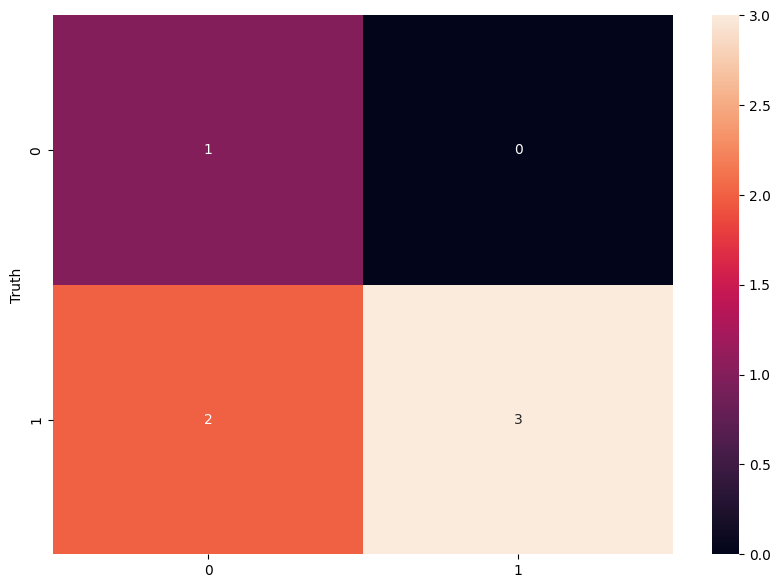

In [14]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.ylabel('Truth')

[Text(0.3333333333333333, 0.9, 'age <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.2777777777777778, 0.8, 'True  '),
 Text(0.4444444444444444, 0.7, 'gender <= 0.5\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.38888888888888884, 0.8, '  False'),
 Text(0.2222222222222222, 0.5, 'age <= 1.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.3, 'm_status <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.5, 'income <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.3, 'income <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1

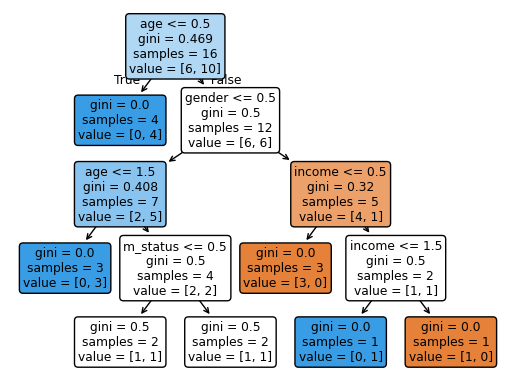

In [15]:
from sklearn import tree
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)